In [1]:
# Calculate the normal daily returns and log-returns by using ‘numpy’. Then provide the annualized return and volatility of AAPL.
import pandas as pd 
df = pd.read_csv("AAPL.csv",sep =',')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-12,63.985001,67.500000,62.000000,62.057499,61.580158,418474000
1,2020-03-13,66.222504,69.980003,63.237499,69.492500,68.957970,370732000
2,2020-03-16,60.487499,64.769997,60.000000,60.552502,60.086731,322423600
3,2020-03-17,61.877499,64.402496,59.599998,63.215000,62.728752,324056000
4,2020-03-18,59.942501,62.500000,59.279999,61.667500,61.193157,300233600


In [2]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2021-03-08,120.930000,121.000000,116.209999,116.360001,116.360001,153918600
249,2021-03-09,119.029999,122.059998,118.790001,121.089996,121.089996,129159600
250,2021-03-10,121.690002,122.169998,119.449997,119.980003,119.980003,111760400
251,2021-03-11,122.540001,123.209999,121.260002,121.959999,121.959999,102753600
252,2021-03-12,120.400002,121.070000,119.160004,120.970001,120.970001,75520002


In [3]:
# Calculate the normal daily returns and log-returns by using ‘numpy’. Then provide the annualized return and volatility of AAPL.
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / (adjclose_yesterday)
    normal_return.append(x)
normal_return[:5]

[0.11980826681217661,
 -0.12864704398925872,
 0.04397012378656433,
 -0.0244799226995622,
 -0.007662033191063984]

In [4]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.11315748030599253,
 -0.13770815343189005,
 0.043030871988293244,
 -0.024784537582395405,
 -0.007691537372006204]

In [5]:
dfnr = pd.DataFrame(normal_return, columns = ['normal'])
nr = dfnr.mean() * len(dfnr) # len (252)
nv = dfnr.std() * (len(dfnr) ** 0.5) # len (252); power of 0.5 = square root
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annualized normal return is 0.76915791 and its annualized volatility is 0.43278899


In [6]:
dflr = pd.DataFrame(log_return, columns = ['log'])
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f' % (lr, lv))


The annualized log return is 0.67520288 and its annualized volatility is 0.43186439


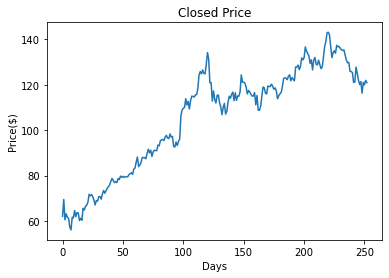

In [7]:
# Plot the daily close price by using ‘matplotlib’.
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price($)')
plt.title('Closed Price');

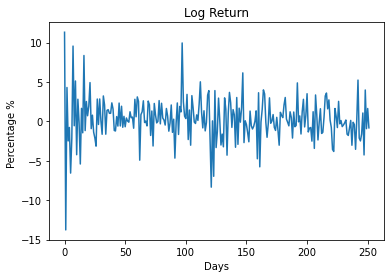

In [9]:
# Plot the daily log return by using ‘matplotlib’
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

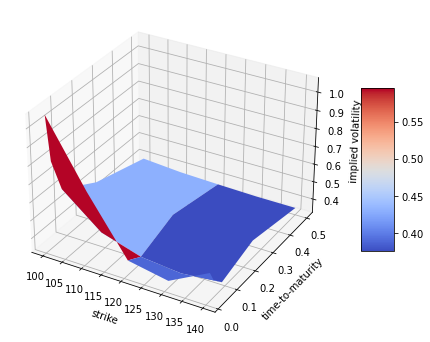

In [11]:
# Calculate the implied vol by using the Excel Spreadsheet for the call option with the strike is $ 100, 110, 120, 130 and 140, the expiry time is 1 week, 2 weeks, 1 month, 1 quarter and 6 months. These implied vol should be form a 5 x 5 matrix. Insert these values into Python by using ‘pandas’
strike = np.array([100, 110, 120, 130, 140]) # strike prices
ttm = np.array([1/52, 2/52, 1/12, 3/12, 6/12]) # time to maturity
strike, ttm = np.meshgrid(strike, ttm)
# calulate in Excel using IMPVOL/IV-W5 sheet; copy paste values matrix
v1 = np.array([1.0630, 0.7140, 0.4038, 0.3626, 0.4793])
v2 = np.array([0.7970, 0.5567, 0.3911, 0.3579, 0.4210])
v3 = np.array([0.6037, 0.4267, 0.3591, 0.3380, 0.3608])
v4 = np.array([0.4850, 0.4444, 0.4310, 0.4231, 0.4224])
v5 = np.array([0.3939, 0.3767, 0.3690, 0.3634, 0.3628])
iv = np.array([v1, v2, v3, v4, v5])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5);

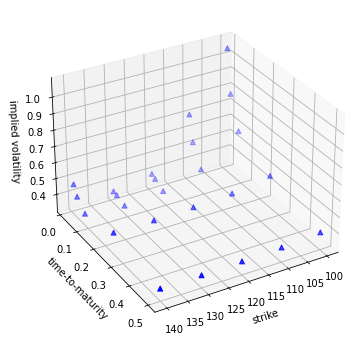

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir='z', s=25, c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility');